In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

In [3]:
output_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/"

Plot metrics

In [4]:
maxent_results0 = pd.read_csv("/Users/liting/Documents/GitHub/r_chagasM/output/figures/combined_mean_std.csv")
rf_results = pd.read_csv("/Users/liting/Documents/GitHub/r_chagasM/output/rf/combined_mean_std.csv")
bug_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']


In [5]:
maxent_results= maxent_results0[maxent_results0["method_name"]=="pixel_buffer_off"]

In [6]:
rf_results

,auc_mean,auc_std,mae_mean,mae_std,bias_mean,bias_std,tss_mean,tss_std,tss_threshold_mean,tss_threshold_std,species,method_name
0,0.996092,0.001095,0.039101,0.002731,-0.030754,0.003793,0.940960,0.013231,0.628219,0.008803,San,pixel_buffer_off
1,0.994402,0.003364,0.048677,0.003500,-0.045798,0.003738,0.919382,0.047460,0.673000,0.034501,Rub,pixel_buffer_off
2,0.986319,0.009854,0.082423,0.008297,-0.081334,0.008702,0.874732,0.122697,0.665100,0.054910,Rec,pixel_buffer_off
3,0.992627,0.002206,0.057212,0.004923,-0.050511,0.005681,0.880650,0.046848,0.705400,0.041338,Pro,pixel_buffer_off
4,0.999507,0.000666,0.027355,0.005788,-0.026887,0.005914,0.961451,0.041847,0.815000,0.022488,Mex,pixel_buffer_off
5,0.998127,0.002412,0.030570,0.002256,-0.030006,0.002374,0.943100,0.101575,0.867500,0.024683,Maz,pixel_buffer_off
6,0.988928,0.011554,0.080171,0.008021,-0.079800,0.008245,0.777698,0.242304,0.811900,0.013740,Neo,pixel_buffer_off
7,0.999295,0.000889,0.021371,0.001744,-0.020157,0.001516,0.964993,0.039879,0.701100,0.051617,Lon,pixel_buffer_off
8,0.988613,0.010381,0.071485,0.007154,-0.069728,0.006881,0.864967,0.074938,0.669417,0.022256,Lec,pixel_buffer_off
9,0.985023,0.014187,0.088346,0.005509,-0.087425,0.005871,0.793499,0.224648,0.722500,0.014630,Ind,pixel_buffer_off


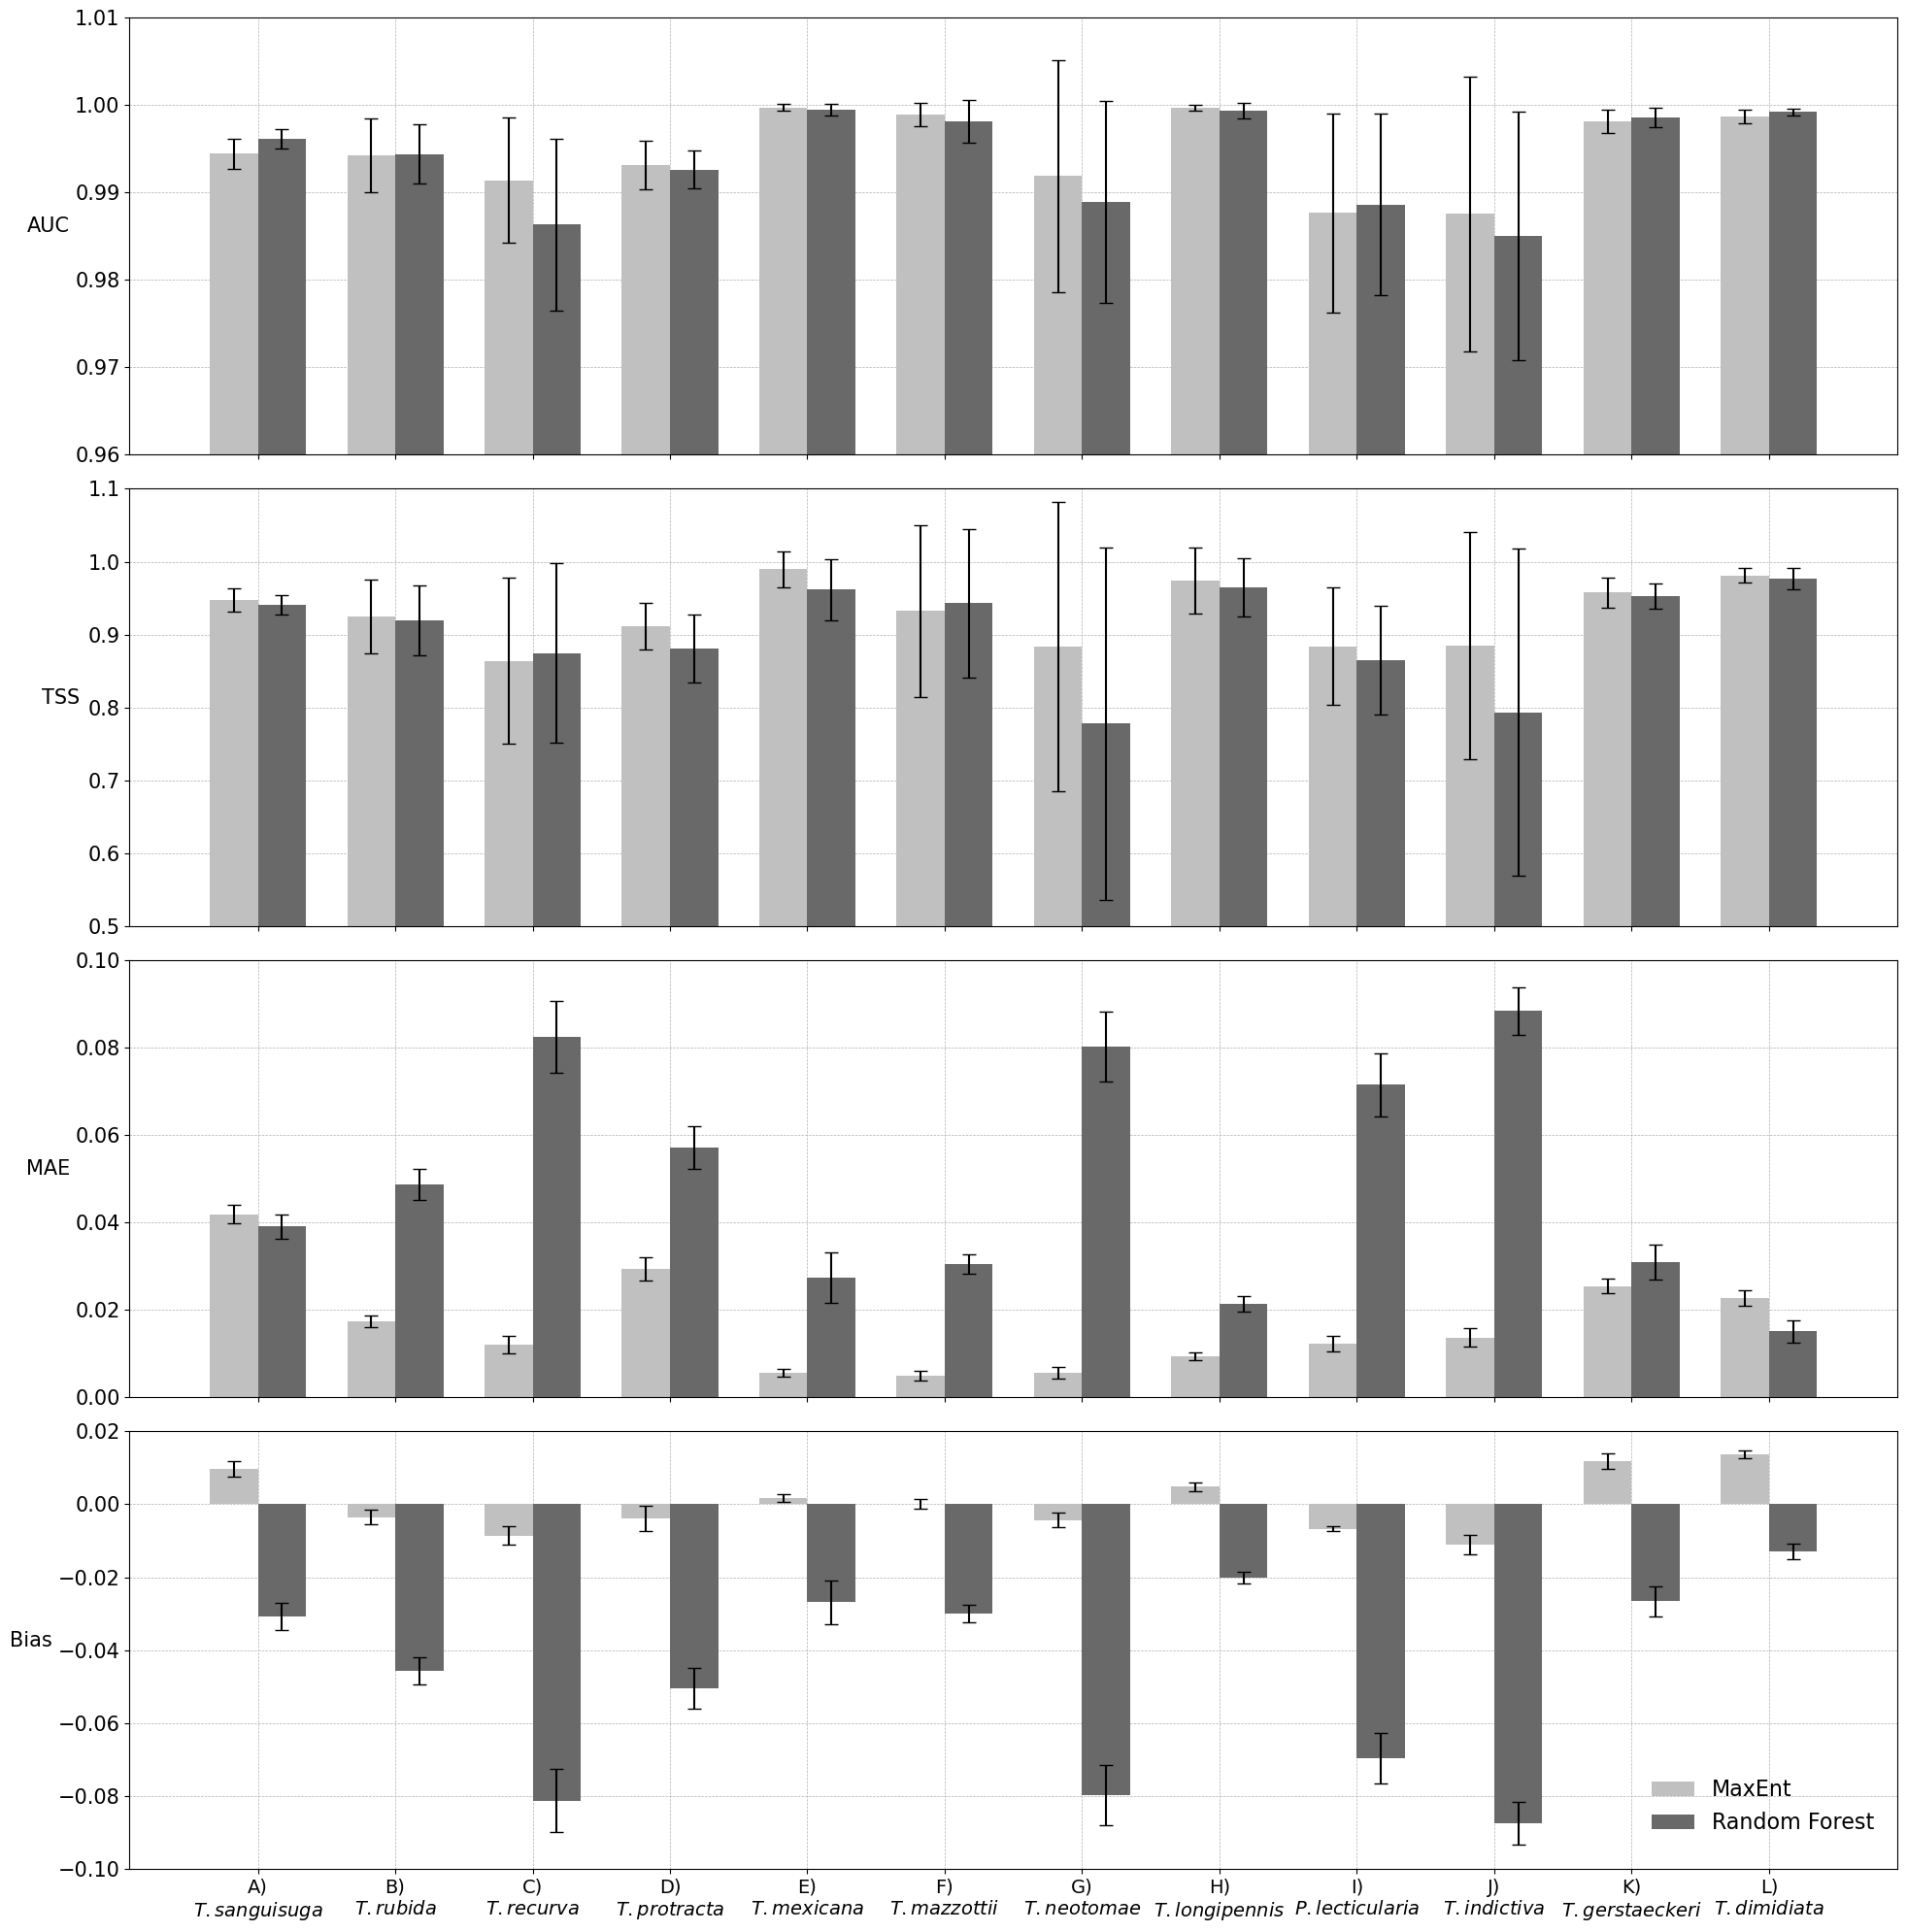

In [23]:
# Ensure the order of species matches the order of bug_name_list_full
order = [maxent_results['species'].tolist().index(s) for s in ['San', 'Rub', 'Rec', 'Pro', 'Mex', 'Maz', 'Neo', 'Lon', 'Lec', 'Ind', 'Ger', 'Dim']]
maxent_results = maxent_results.iloc[order]
rf_results = rf_results.iloc[order]

label_size = 15

# Full names of the species with labels
bug_name_list_full1 = [f'{chr(65 + i)})\n{name}' for i, name in enumerate(['T. sanguisuga','T. rubida','T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis','P. lecticularia','T. indictiva','T. gerstaeckeri','T. dimidiata'])]

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(20, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

species = maxent_results['species'].unique()
bar_width = 0.35
index = np.arange(len(species))-1

colors = {'MaxEnt': 'silver', 'Random Forest': 'dimgrey'}


# AUC Plot
axes[0].grid(linestyle = '--', linewidth = 0.5)
axes[0].set_axisbelow(True)
axes[0].bar(index - bar_width / 2, maxent_results['auc_mean'], bar_width, yerr=maxent_results['auc_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[0].bar(index + bar_width / 2, rf_results['auc_mean'], bar_width, yerr=rf_results['auc_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[0].set_ylabel('AUC',fontsize = label_size, rotation=0, labelpad=20)
axes[0].tick_params(axis='y', labelsize=label_size)
axes[0].set_xticks(index)
axes[0].set_xticklabels([])

axes[0].set_ylim(0.96, 1.01)



# TSS Plot
axes[1].grid(linestyle = '--', linewidth = 0.5)
axes[1].set_axisbelow(True)
axes[1].bar(index - bar_width / 2, maxent_results['tss_mean'], bar_width, yerr=maxent_results['tss_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[1].bar(index + bar_width / 2, rf_results['tss_mean'], bar_width, yerr=rf_results['tss_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[1].set_ylabel('TSS',fontsize = label_size, rotation=0, labelpad=20)
axes[1].tick_params(axis='y', labelsize=label_size)
axes[1].set_xticks(index)
axes[1].set_xticklabels([])
axes[1].set_ylim(0.5, 1.1)

# MAE Plot
axes[2].grid(linestyle = '--', linewidth = 0.5)
axes[2].set_axisbelow(True)
axes[2].bar(index - bar_width / 2, maxent_results['mae_mean'], bar_width, yerr=maxent_results['mae_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[2].bar(index + bar_width / 2, rf_results['mae_mean'], bar_width, yerr=rf_results['mae_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[2].set_ylabel('MAE',fontsize = label_size, rotation=0, labelpad=20)
axes[2].tick_params(axis='y', labelsize=label_size)
axes[2].set_xticks(index)
axes[2].set_xticklabels([])
axes[2].set_ylim(0.0, 0.1)

# Bias Plot
axes[3].grid(linestyle = '--', linewidth = 0.5)
axes[3].set_axisbelow(True)
axes[3].bar(index - bar_width / 2, maxent_results['bias_mean'], bar_width, yerr=maxent_results['bias_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[3].bar(index + bar_width / 2, rf_results['bias_mean'], bar_width, yerr=rf_results['bias_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[3].set_ylabel('Bias',fontsize = label_size, rotation=0, labelpad=20)
axes[3].tick_params(axis='y', labelsize=label_size)
axes[3].set_xticks(index)
axes[3].set_xticklabels([f'{chr(65 + i)})\n$\\it{{{name}}}$' for i, name in enumerate(['T. sanguisuga','T. rubida','T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis','P. lecticularia','T. indictiva','T. gerstaeckeri','T. dimidiata'])], rotation=0, fontsize=label_size-1)  # Italic names with labels
axes[3].set_ylim(-0.10, 0.02)  # Adjust y-limit to provide space for text labels
axes[3].legend(bbox_to_anchor=(0.85, 0.25),fontsize="16",frameon=False)


#fig.suptitle('Evaluation Metrics of MaxEnt and Random Forest for 12 Species', fontsize=18)
fig.tight_layout()
plt.savefig(output_dir+"/figures/method_performance/maxent_rf_12_4metrics.png",dpi=300,bbox_inches='tight')
plt.show()


[0, 3, 10, 11]


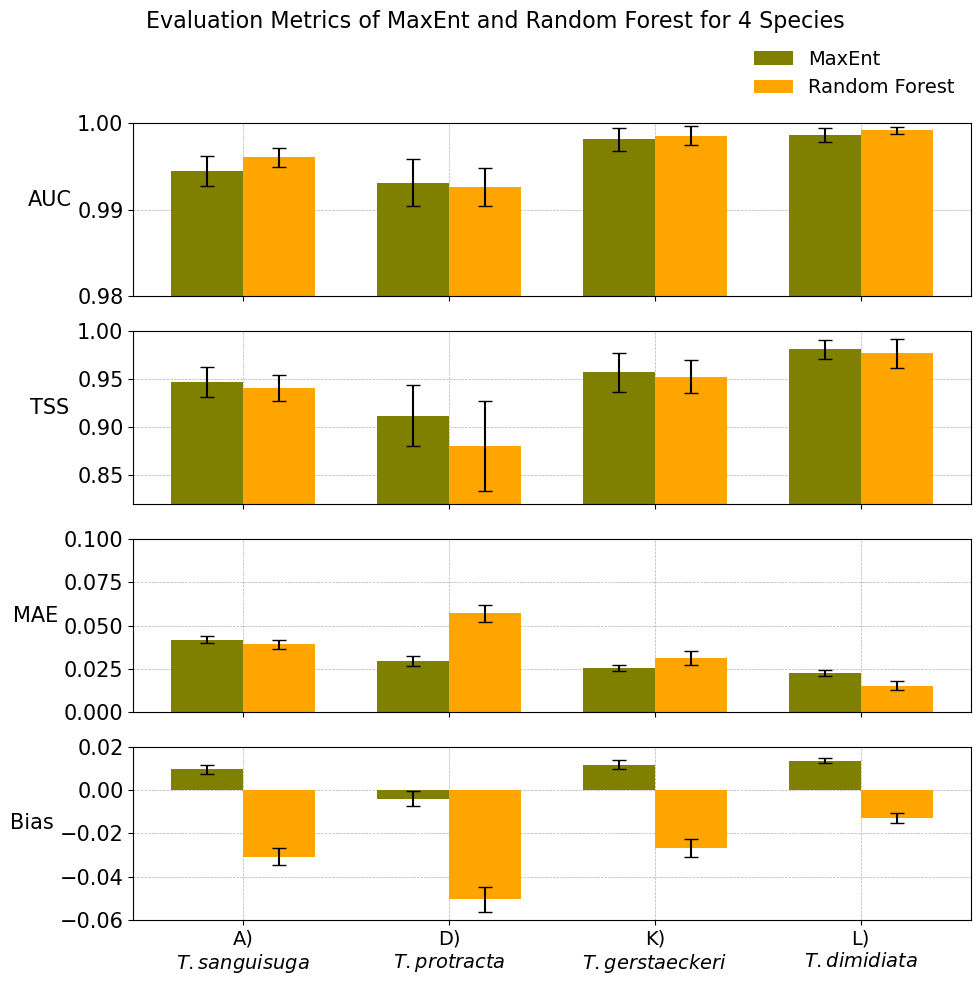

In [9]:
# Ensure the order of species matches the order of bug_name_list_full
order = [maxent_results['species'].tolist().index(s) for s in ['San', 'Pro', 'Ger', 'Dim']]
print(order)
maxent_results = maxent_results.iloc[order]
rf_results = rf_results.iloc[order]

# Full names of the species with labels
bug_name_list_full1 = [f'{chr(65 + i)})\n{name}' for i, name in enumerate(['T. sanguisuga', 'T. protracta', 'T. gerstaeckeri', 'T. dimidiata'])]

label_size = 15

# Create subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axes = axes.flatten()

species = maxent_results['species'].unique()
bar_width = 0.35
index = np.arange(len(species))

colors = {'MaxEnt': 'olive', 'Random Forest': 'orange'}

# AUC Plot
axes[0].grid(linestyle='--', linewidth=0.5)
axes[0].set_axisbelow(True)
axes[0].bar(index - bar_width / 2, maxent_results['auc_mean'], bar_width, yerr=maxent_results['auc_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[0].bar(index + bar_width / 2, rf_results['auc_mean'], bar_width, yerr=rf_results['auc_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[0].set_ylabel('AUC', fontsize=label_size, rotation=0, labelpad=20)
axes[0].tick_params(axis='y', labelsize=label_size)
axes[0].set_xticks(index)
axes[0].set_xticklabels([])
axes[0].legend(bbox_to_anchor=(0.72, 1.05), fontsize="14", frameon=False)
axes[0].set_ylim(0.980, 1.000)

# TSS Plot
axes[1].grid(linestyle='--', linewidth=0.5)
axes[1].set_axisbelow(True)
axes[1].bar(index - bar_width / 2, maxent_results['tss_mean'], bar_width, yerr=maxent_results['tss_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[1].bar(index + bar_width / 2, rf_results['tss_mean'], bar_width, yerr=rf_results['tss_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[1].set_ylabel('TSS', fontsize=label_size, rotation=0, labelpad=20)
axes[1].tick_params(axis='y', labelsize=label_size)
axes[1].set_xticks(index)
axes[1].set_xticklabels([])
axes[1].set_ylim(0.820, 1.000)

# MAE Plot
axes[2].grid(linestyle='--', linewidth=0.5)
axes[2].set_axisbelow(True)
axes[2].bar(index - bar_width / 2, maxent_results['mae_mean'], bar_width, yerr=maxent_results['mae_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[2].bar(index + bar_width / 2, rf_results['mae_mean'], bar_width, yerr=rf_results['mae_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[2].set_ylabel('MAE', fontsize=label_size, rotation=0, labelpad=20)
axes[2].tick_params(axis='y', labelsize=label_size)
axes[2].set_xticks(index)
axes[2].set_xticklabels([])
axes[2].set_ylim(0.000, 0.100)

# Bias Plot
axes[3].grid(linestyle='--', linewidth=0.5)
axes[3].set_axisbelow(True)
axes[3].bar(index - bar_width / 2, maxent_results['bias_mean'], bar_width, yerr=maxent_results['bias_std'], label='MaxEnt', color=colors['MaxEnt'], capsize=5)
axes[3].bar(index + bar_width / 2, rf_results['bias_mean'], bar_width, yerr=rf_results['bias_std'], label='Random Forest', color=colors['Random Forest'], capsize=5)
axes[3].set_ylabel('Bias', fontsize=label_size, rotation=0, labelpad=20)
axes[3].tick_params(axis='y', labelsize=label_size)
axes[3].set_xticks(index)
axes[3].set_xticklabels([f'{label})\n$\\it{{{name}}}$' for label, name in zip(['A', 'D', 'K', 'L'], ['T. sanguisuga', 'T. protracta', 'T. gerstaeckeri', 'T. dimidiata'])], rotation=0, fontsize=label_size - 1)  # Italic names with labels
axes[3].set_ylim(-0.060, 0.020)  # Adjust y-limit to provide space for text labels

fig.suptitle('Evaluation Metrics of MaxEnt and Random Forest for 4 Species', fontsize=16)
fig.tight_layout()
plt.savefig(output_dir+"/figures/method_performance/maxent_rf_4_4metrics.png",dpi=300,bbox_inches='tight')
plt.show()


Variable Importance

For MaxEnt

In [13]:
# Initialize a list to hold all DataFrames
dataframes = []
# Read MaxEnt Variable Importance
maxent_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/pixel_buffer_off/"
bug_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
# Extracting the relevant columns for variables, contribution, permutation importance, and training gain
variables = ['AHM', 'CMD', 'CMI', 'DD1040', 'DD18', 'DD5', 'DD_0', 'DD_18', 'EMT', 'EXT', 'Eref', 'FFP', 'MAP', 
             'MAT', 'MCMT', 'MSP', 'MWMT', 'NFFD', 'PAS', 'PPT_at', 'PPT_sm', 'PPT_sp', 'PPT_wt', 'RH', 'SHM', 'TD', 
             'Tave_at', 'Tave_sm', 'Tave_sp', 'Tave_wt', 'bFFP', 'barren', 'cropland', 'eFFP', 'forest', 'grassland', 
             'permanent_snow_ice', 'urban', 'water']

for this_cbug in bug_name_list_c:
    vi_path = maxent_dir + this_cbug + "/evaluate/all_input/maxentResults.csv"
    vi = pd.read_csv(vi_path)
    # Prepare the data for the new DataFrame
    data = {
        'variable': [],
        'percent contribution': [],
        'permutation importance': [],
        'jackknife with only one variable': []
    }

    for var in variables:
        data['variable'].append(var)
        data['percent contribution'].append(vi[f'{var} contribution'].values[0])
        data['permutation importance'].append(vi[f'{var} permutation importance'].values[0])
        data['jackknife with only one variable'].append(vi[f'Training gain with only {var}'].values[0])

    # Create the new DataFrame
    filtered_df = pd.DataFrame(data)

    # Display the DataFrame (assuming you're using a Jupyter notebook or similar environment)
    filtered_df.head()
    filtered_df['species'] = this_cbug
    dataframes.append(filtered_df)


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/maxent_variableimportance.csv', index=False)

In [14]:
print(combined_df)

               variable  percent contribution  permutation importance  \
0                   AHM                0.0252                  2.6639   
1                   CMD                0.0324                  0.9206   
2                   CMI                0.0000                  0.0000   
3                DD1040                0.0525                  0.3455   
4                  DD18               64.7964                 25.3694   
..                  ...                   ...                     ...   
463              forest                0.0132                  0.0000   
464           grassland                0.1230                  0.2452   
465  permanent_snow_ice                0.0000                  0.0000   
466               urban                0.0058                  0.0209   
467               water                0.0044                  0.0269   

     jackknife with only one variable species  
0                              0.7675     San  
1                          

For RF

In [15]:
# Initialize a list to hold all DataFrames
dataframes = []
# Read MaxEnt Variable Importance
maxent_dir = "/Users/liting/Documents/GitHub/r_chagasM/output/rf/pixel_buffer_off/"
bug_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']
# Extracting the relevant columns for variables, contribution, permutation importance, and training gain
variables = ['AHM', 'CMD', 'CMI', 'DD1040', 'DD18', 'DD5', 'DD_0', 'DD_18', 'EMT', 'EXT', 'Eref', 'FFP', 'MAP', 
             'MAT', 'MCMT', 'MSP', 'MWMT', 'NFFD', 'PAS', 'PPT_at', 'PPT_sm', 'PPT_sp', 'PPT_wt', 'RH', 'SHM', 'TD', 
             'Tave_at', 'Tave_sm', 'Tave_sp', 'Tave_wt', 'bFFP', 'barren', 'cropland', 'eFFP', 'forest', 'grassland', 
             'permanent_snow_ice', 'urban', 'water']



for this_cbug in bug_name_list_c:
    vi_path = maxent_dir + this_cbug + "/evaluate/cv_importance.csv"
    df = pd.read_csv(vi_path)
    # Ensure the first column 'Unnamed: 0' is set as the index
    df.set_index('Unnamed: 0', inplace=True)

    # Define the relevant base variable names from the index
    variables = df.index.unique().tolist()
    # Prepare the data for the new DataFrame
    data = {
        'variable': [],
        'MeanDecreaseAccuracy_mean': [],
        'MeanDecreaseAccuracy_std': [],
        'MeanDecreaseGini_mean': [],
        'MeanDecreaseGini_std': []
    }

    for var in variables:
        acc_cols = [col for col in df.columns if 'MeanDecreaseAccuracy' in col]
        gini_cols = [col for col in df.columns if 'MeanDecreaseGini' in col]

        if acc_cols:
            mean_acc = df.loc[var, acc_cols].mean()
            std_acc = df.loc[var, acc_cols].std()
        else:
            mean_acc = None
            std_acc = None
        
        if gini_cols:
            mean_gini = df.loc[var, gini_cols].mean()
            std_gini = df.loc[var, gini_cols].std()
        else:
            mean_gini = None
            std_gini = None
        
        data['variable'].append(var)
        data['MeanDecreaseAccuracy_mean'].append(mean_acc)
        data['MeanDecreaseAccuracy_std'].append(std_acc)
        data['MeanDecreaseGini_mean'].append(mean_gini)
        data['MeanDecreaseGini_std'].append(std_gini)


    # Create the new DataFrame
    filtered_df = pd.DataFrame(data)

    # Display the DataFrame (assuming you're using a Jupyter notebook or similar environment)
    filtered_df.head()
    filtered_df['species'] = this_cbug
    dataframes.append(filtered_df)


# Combine all DataFrames into one
combined_df = pd.concat(dataframes, ignore_index=True)


# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/rf_variableimportance.csv', index=False)

overall plot

In [16]:
# Load the data
maxent_file_path = output_dir + '/figures/method_performance/maxent_variableimportance.csv'
rf_file_path = output_dir + '/figures/method_performance/rf_variableimportance.csv'

maxent_df = pd.read_csv(maxent_file_path)
rf_df = pd.read_csv(rf_file_path)

In [17]:
rf_df.keys()

Index(['variable', 'MeanDecreaseAccuracy_mean', 'MeanDecreaseAccuracy_std',
       'MeanDecreaseGini_mean', 'MeanDecreaseGini_std', 'species'],
      dtype='object')

In [18]:
bug_name_list_full = ['T. sanguisuga','T. rubida',' T. recurva','T. protracta','T. mexicana','T. mazzottii','T. neotomae','T. longipennis',' P. lecticularia',' T. indictiva','T. gerstaeckeri','T. dimidiata']
bug_name_list_c = ['San','Rub','Rec','Pro','Mex','Maz','Neo','Lon','Lec','Ind','Ger','Dim']

In [20]:
row_colors = ['#FF6633', 'orange', '#FF33FF', 'purple', '#00B3E6', 'midnightblue', '#3366E6', '#999966']
dataframes = {
            'species': [],
            'accuracy_mean': [],
            'gini_mean': [],
            'percent_contribution': [],
            'permutation_importance': [],
            'jackknife_gain': []
        }



for bug_name, bug_full_name,number_letter in zip(bug_name_list_c, bug_name_list_full,range(len(bug_name_list_full))):
    # Filter for the bug 'San'
    maxent_san = maxent_df[maxent_df['species'] == bug_name]
    rf_san = rf_df[rf_df['species'] == bug_name]
    # Get max values for normalization
    max_accuracy = rf_san['MeanDecreaseAccuracy_mean'].max()
    max_gini = rf_san['MeanDecreaseGini_mean'].max()
    max_contribution = maxent_san['percent contribution'].max()
    max_permutation = maxent_san['permutation importance'].max()
    max_jackknife = maxent_san['jackknife with only one variable'].max()
    print(bug_name)
    print('max_accuracy', max_accuracy, 'max_gini', max_gini, 'max_contribution', max_contribution, 'max_permutation', max_permutation, 'max_jackknife', max_jackknife)
    dataframes['species'].append(bug_name)
    dataframes['accuracy_mean'].append(max_accuracy)
    dataframes['gini_mean'].append(max_gini)
    dataframes['percent_contribution'].append(max_contribution)
    dataframes['permutation_importance'].append(max_permutation)
    dataframes['jackknife_gain'].append(max_jackknife)
    # Prepare the radar chart data
    variables = ['Tave_sp','Tave_sm',  'Tave_at','Tave_wt', 'MAT', #tempearture
                 'MCMT', 'MWMT', 'TD','EMT', 'EXT',#temperature
                 'DD_0', 'DD5',  'DD_18','DD18', 'DD1040', # degree-days temperature
                 'FFP', 'bFFP', 'eFFP','PAS', 'NFFD', #froze related
                 'Eref', 'CMD', 'CMI','AHM','SHM',  #moisture
                 'PPT_sp','PPT_sm', 'PPT_at', 'PPT_wt','RH',#precipitation
                 'MAP','MSP','barren','cropland', 'forest', 
                 'grassland', 'permanent_snow_ice', 'urban', 'water']

    # Create the subplot figure
    fig = make_subplots(
        rows=8, cols=5, 
        specs=[[{'type': 'polar'}]*5 for _ in range(8)]
    )

    # Create radar charts for each variable
    for i, var in enumerate(variables):
        if i >= 39:
            break

        row = (i // 5) + 1
        col = (i % 5) + 1

        # Get the color for the current row
        row_color = row_colors[row - 1]
        
        # Get the values for the radar chart
        accuracy_mean = max(rf_san[rf_san['variable'] == var]['MeanDecreaseAccuracy_mean'].values[0], 0.0)
        gini_mean = max(rf_san[rf_san['variable'] == var]['MeanDecreaseGini_mean'].values[0], 0.0)
        percent_contribution = max(maxent_san[maxent_san['variable'] == var]['percent contribution'].values[0], 0.0)
        permutation_importance = max(maxent_san[maxent_san['variable'] == var]['permutation importance'].values[0], 0.0)
        jackknife_gain = max(maxent_san[maxent_san['variable'] == var]['jackknife with only one variable'].values[0], 0.0)
        print(var)
        print('accuracy_mean', accuracy_mean, 'gini_mean', gini_mean, 'percent_contribution', percent_contribution, 'permutation_importance', permutation_importance, 'jackknife_gain', jackknife_gain)

        # Normalize the values
        accuracy_mean /= max_accuracy
        gini_mean /= max_gini
        percent_contribution /= max_contribution
        permutation_importance /= max_permutation
        jackknife_gain /= max_jackknife

        print('accuracy_mean', accuracy_mean, 'gini_mean', gini_mean, 'percent_contribution', percent_contribution, 'permutation_importance', permutation_importance, 'jackknife_gain', jackknife_gain)



        radar_trace = go.Scatterpolar(
            r=[accuracy_mean, gini_mean, percent_contribution, permutation_importance, jackknife_gain],
            theta=['MeanDecreaseAccuracy_mean', 'MeanDecreaseGini_mean', 'Percent Contribution', 'Permutation Importance', 'Jackknife Gain'],
            fill='toself',
            name=var,
            showlegend=False,
            marker=dict(color=row_color)
        )

        fig.add_trace(radar_trace, row=row, col=col)
        
        fig.add_annotation(
            x=1.035*(col - 1)/ 5 + 0.43 / 5,
            y=-1.0352*(row-1) / 8+0.9,
            text=var,
            showarrow=False,
            xanchor='center',
            yanchor='top',
            font=dict(size=22)
        )

    # Add a small blank radar plot with axis labels at the bottom right corner
    row, col = 8, 5
    fig.add_trace(go.Scatterpolar(
        r=[0, 0, 0, 0, 0],
        theta=['RF-Acc', 'RF-Gini', 'MaxEnt-Con', 'MaxEnt-Per', 'MaxEnt-Jac'],
        fill='toself',
        name='Reference Plot',
        showlegend=True
    ), row=row, col=col)

    # Adjust layout to ensure proper spacing
    fig.update_layout(
        height=1800, 
        width=1200,
        title={
            'text': f"{chr(65 + number_letter)}) <i>{bug_full_name}</i>",
            'y':0.97,  # adjust y position of the title
            'x':0.5,   # adjust x position of the title
            'xanchor': 'center',
            'yanchor': 'top',
            'font': {'size': 28}
        },
        polar=dict(
            radialaxis=dict(
                visible=True,
                range=[0, 1],
                tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
            )),
        showlegend=False
    )

    # Update layout to hide axis labels and ticks for all subplots except the last one
    for i in range(1, 8 * 5 + 1):
        fig.update_polars(
            angularaxis_showticklabels=False,
            radialaxis_showticklabels=False,
            radialaxis=dict(
                visible=True,
                range=[0, 1],
                tickvals=[0, 0.2, 0.4, 0.6, 0.8, 1.0]
            ),
            row=(i - 1) // 5 + 1,
            col=(i - 1) % 5 + 1
        )

    # Update the last subplot to have the axis labels and ticks
    fig.update_polars(
        angularaxis_showticklabels=True,
        #radialaxis_showticklabels=True,
        row=8,
        col=5,
        domain=dict(
                x=[0.88, 0.96],  # making the last plot smaller
                y=[0, 0.1]
            ),
        angularaxis = dict(
            tickfont_size=18
        )
    )

    fig.add_annotation(
        x=1.035*(5 - 1)/ 5 + 0.5 / 5+0.05,
        y=-1.0352*(8-1) / 8+0.885,
        text='Reference Plot',
        font=dict(size=18,color='slategray',weight='bold'),
        showarrow=False,        
    )


    fig.show()
    fig.write_image(output_dir + '/figures/method_performance/'+f"Variable_Importance_{bug_name}.png", scale=3)

# Combine all DataFrames into one
combined_df = pd.DataFrame(dataframes)
# Export to CSV
combined_df.to_csv(output_dir + '/figures/method_performance/variableimportance_max_value_across_var.csv', index=False)



San
max_accuracy 23.90078008877185 max_gini 73.81724531507687 max_contribution 64.7964 max_permutation 39.2445 max_jackknife 1.7743
Tave_sp
accuracy_mean 12.73769496964319 gini_mean 57.91750515758743 percent_contribution 0.0102 permutation_importance 0.1018 jackknife_gain 1.7059
accuracy_mean 0.5329405535021481 gini_mean 0.7846066987514367 percent_contribution 0.0001574161527492268 permutation_importance 0.002593994062862312 jackknife_gain 0.9614495857521276
Tave_sm
accuracy_mean 10.446451438652828 gini_mean 66.92725241783498 percent_contribution 0.7664 permutation_importance 0.0206 jackknife_gain 1.7063
accuracy_mean 0.4370757523333048 gini_mean 0.9066614736457167 percent_contribution 0.011827817594804647 permutation_importance 0.0005249143192039648 jackknife_gain 0.9616750267711209
Tave_at
accuracy_mean 12.674886306804868 gini_mean 66.46713119708853 percent_contribution 0.0144 permutation_importance 0.4175 jackknife_gain 1.7008
accuracy_mean 0.5303126617511241 gini_mean 0.90042822532

Rub
max_accuracy 10.62690558388755 max_gini 27.38365330548223 max_contribution 46.9333 max_permutation 36.0256 max_jackknife 2.4494
Tave_sp
accuracy_mean 5.222938482665825 gini_mean 4.858121812224364 percent_contribution 0.4961 permutation_importance 1.4756 jackknife_gain 2.0267
accuracy_mean 0.4914825337852641 gini_mean 0.17740955737457295 percent_contribution 0.01057032000732955 permutation_importance 0.04095976194705987 jackknife_gain 0.8274271250102067
Tave_sm
accuracy_mean 0.0 gini_mean 3.996591508932181 percent_contribution 3.2165 permutation_importance 1.3917 jackknife_gain 2.0853
accuracy_mean 0.0 gini_mean 0.1459480758227413 percent_contribution 0.0685334293561288 permutation_importance 0.03863086249777936 jackknife_gain 0.8513513513513515
Tave_at
accuracy_mean 2.142768579687453 gini_mean 4.455529541810821 percent_contribution 0.0436 permutation_importance 0.2772 jackknife_gain 1.9766
accuracy_mean 0.20163617365118078 gini_mean 0.16270763773213637 percent_contribution 0.000928

Rec
max_accuracy 7.039369419498892 max_gini 4.900768577825852 max_contribution 33.1241 max_permutation 48.8643 max_jackknife 2.2299
Tave_sp
accuracy_mean 1.0943171620688583 gini_mean 0.990392848036996 percent_contribution 0.0119 permutation_importance 0.1062 jackknife_gain 1.8762
accuracy_mean 0.1554567031299174 gini_mean 0.20208929116101376 percent_contribution 0.00035925504391062704 permutation_importance 0.002173365831496614 jackknife_gain 0.8413830216601641
Tave_sm
accuracy_mean 0.0 gini_mean 0.5548267107604159 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.8562
accuracy_mean 0.0 gini_mean 0.11321218334422066 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8324140095968429
Tave_at
accuracy_mean 0.0 gini_mean 1.8974990957271176 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.9383
accuracy_mean 0.0 gini_mean 0.38718398259256565 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8692318041167764
Tave_wt


Pro
max_accuracy 15.470910187304847 max_gini 48.752910436716014 max_contribution 49.4469 max_permutation 34.3034 max_jackknife 1.9921
Tave_sp
accuracy_mean 6.142930386453905 gini_mean 9.604731300330275 percent_contribution 0.0033 permutation_importance 0.0 jackknife_gain 1.5865
accuracy_mean 0.3970632827727669 gini_mean 0.19700836758859247 percent_contribution 6.673825861681925e-05 permutation_importance 0.0 jackknife_gain 0.7963957632648964
Tave_sm
accuracy_mean 0.4862801889139245 gini_mean 2.0311128114039976 percent_contribution 0.0225 permutation_importance 0.0198 jackknife_gain 1.2275
accuracy_mean 0.03143190562330052 gini_mean 0.041661365305369714 percent_contribution 0.00045503358147831307 permutation_importance 0.0005772022598343022 jackknife_gain 0.6161839265097134
Tave_at
accuracy_mean 4.3880014897797395 gini_mean 10.644310194105952 percent_contribution 1.0348 permutation_importance 0.2146 jackknife_gain 1.5998
accuracy_mean 0.2836291747967392 gini_mean 0.218331789810228 perce

Mex
max_accuracy 9.772129844317435 max_gini 14.32026850629266 max_contribution 45.5273 max_permutation 40.3109 max_jackknife 3.4522
Tave_sp
accuracy_mean 0.5290574352093167 gini_mean 3.2938859415950645 percent_contribution 0.0012 permutation_importance 0.0 jackknife_gain 2.5145
accuracy_mean 0.05413941931164243 gini_mean 0.230015655093873 percent_contribution 2.6357811686614404e-05 permutation_importance 0.0 jackknife_gain 0.7283761079891083
Tave_sm
accuracy_mean 5.101706178946469 gini_mean 0.4015575325073394 percent_contribution 0.0722 permutation_importance 0.0536 jackknife_gain 1.1907
accuracy_mean 0.5220669659760148 gini_mean 0.028041201345553376 percent_contribution 0.0015858616698113002 permutation_importance 0.0013296651774085918 jackknife_gain 0.34491049186026307
Tave_at
accuracy_mean 2.6962335507763577 gini_mean 1.008269476388157 percent_contribution 0.0016 permutation_importance 0.0 jackknife_gain 2.0815
accuracy_mean 0.2759105326812903 gini_mean 0.07040855944461516 percent_c

Maz
max_accuracy 5.327322246954058 max_gini 7.216925080857497 max_contribution 48.3352 max_permutation 76.3793 max_jackknife 3.9295
Tave_sp
accuracy_mean 0.0 gini_mean 2.635604935605905 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 3.0529
accuracy_mean 0.0 gini_mean 0.36519776858938224 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7769181829749332
Tave_sm
accuracy_mean 3.794762426592883 gini_mean 0.186652788294081 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.4822
accuracy_mean 0.7123207965807908 gini_mean 0.025863201599413497 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.37719811680875426
Tave_at
accuracy_mean 0.0 gini_mean 0.9525240922465033 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.8577
accuracy_mean 0.0 gini_mean 0.13198475549829689 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.7272426517368622
Tave_wt
accuracy_mean 0.0 gini_mean 7.035919920685

Neo
max_accuracy 3.830165100953136 max_gini 1.516692308578935 max_contribution 37.67 max_permutation 47.4044 max_jackknife 3.2905
Tave_sp
accuracy_mean 0.4624592992293408 gini_mean 0.779553062670044 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.8782
accuracy_mean 0.12074134849024076 gini_mean 0.5139823405582153 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8746998936331865
Tave_sm
accuracy_mean 0.0 gini_mean 1.45047564768139 percent_contribution 4.5867 permutation_importance 47.4044 jackknife_gain 2.8805
accuracy_mean 0.0 gini_mean 0.9563414012697231 percent_contribution 0.12176002123705867 permutation_importance 1.0 jackknife_gain 0.8753988755508281
Tave_at
accuracy_mean 0.3139757675049331 gini_mean 0.7522949164466424 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 2.783
accuracy_mean 0.0819744734833494 gini_mean 0.4960102403047756 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8457681203464519
Tave

Lon
max_accuracy 17.12853055384441 max_gini 26.91750434276774 max_contribution 59.0208 max_permutation 47.5963 max_jackknife 2.9481
Tave_sp
accuracy_mean 4.504697432040696 gini_mean 4.13102777099175 percent_contribution 0.4992 permutation_importance 0.0487 jackknife_gain 2.4743
accuracy_mean 0.26299380544524525 gini_mean 0.15346993979780613 percent_contribution 0.008458035133376708 permutation_importance 0.0010231887772789061 jackknife_gain 0.8392863200027135
Tave_sm
accuracy_mean 4.629975717039529 gini_mean 0.5042733876132091 percent_contribution 0.0031 permutation_importance 0.0579 jackknife_gain 1.3298
accuracy_mean 0.2703078178530823 gini_mean 0.018734031996123685 percent_contribution 5.252385599653003e-05 permutation_importance 0.0012164811130276933 jackknife_gain 0.45107018079440997
Tave_at
accuracy_mean 3.160404830560656 gini_mean 1.7304022555480305 percent_contribution 0.3584 permutation_importance 0.0857 jackknife_gain 2.1282
accuracy_mean 0.18451114767993448 gini_mean 0.06428

Lec
max_accuracy 6.166210449365167 max_gini 6.71358607232573 max_contribution 28.0938 max_permutation 44.6958 max_jackknife 2.4394
Tave_sp
accuracy_mean 2.5891204840289617 gini_mean 3.3297956257685213 percent_contribution 0.7216 permutation_importance 0.1471 jackknife_gain 2.1336
accuracy_mean 0.4198884396324035 gini_mean 0.49597869006168993 percent_contribution 0.025685382539919838 permutation_importance 0.0032911369748387996 jackknife_gain 0.8746413052389932
Tave_sm
accuracy_mean 0.0 gini_mean 6.71358607232573 percent_contribution 0.495 permutation_importance 0.0 jackknife_gain 2.4394
accuracy_mean 0.0 gini_mean 1.0 percent_contribution 0.017619545949640134 permutation_importance 0.0 jackknife_gain 1.0
Tave_at
accuracy_mean 2.954824942030467 gini_mean 3.264022938243751 percent_contribution 1.0506 permutation_importance 0.9164 jackknife_gain 2.2998
accuracy_mean 0.479196252916518 gini_mean 0.4861817370151067 percent_contribution 0.037396151464024086 permutation_importance 0.0205030450

Ind
max_accuracy 6.877228338796002 max_gini 2.7267738436766757 max_contribution 41.2726 max_permutation 26.3563 max_jackknife 2.3205
Tave_sp
accuracy_mean 0.0 gini_mean 1.265645389847023 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.9929
accuracy_mean 0.0 gini_mean 0.4641548813378949 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8588235294117647
Tave_sm
accuracy_mean 0.0 gini_mean 1.8099694848233832 percent_contribution 0.0125 permutation_importance 1.3953 jackknife_gain 2.1538
accuracy_mean 0.0 gini_mean 0.6637768984841408 percent_contribution 0.00030286437006633946 permutation_importance 0.05293990431130318 jackknife_gain 0.9281620340443869
Tave_at
accuracy_mean 0.1986300426935644 gini_mean 1.149894892361116 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 1.9958
accuracy_mean 0.02888228119067203 gini_mean 0.42170526720714124 percent_contribution 0.0 permutation_importance 0.0 jackknife_gain 0.8600732600732601
Tave_wt
ac

Ger
max_accuracy 31.92680148993452 max_gini 56.1975462277238 max_contribution 59.445 max_permutation 38.9445 max_jackknife 2.1109
Tave_sp
accuracy_mean 10.677250284336347 gini_mean 51.58706543255103 percent_contribution 0.0099 permutation_importance 0.0 jackknife_gain 2.0843
accuracy_mean 0.3344290622943403 gini_mean 0.9179593931647804 percent_contribution 0.00016654049962149886 permutation_importance 0.0 jackknife_gain 0.9873987398739873
Tave_sm
accuracy_mean 7.660198755671638 gini_mean 4.8611929629121375 percent_contribution 2.939 permutation_importance 0.0876 jackknife_gain 2.0176
accuracy_mean 0.23993003990978082 gini_mean 0.0865018722207835 percent_contribution 0.04944065943308941 permutation_importance 0.0022493548511343065 jackknife_gain 0.9558008432422189
Tave_at
accuracy_mean 8.752546055796042 gini_mean 21.214392299735348 percent_contribution 0.2117 permutation_importance 0.0 jackknife_gain 2.0892
accuracy_mean 0.27414415623674154 gini_mean 0.37749677207916427 percent_contribu

Dim
max_accuracy 23.615719815364937 max_gini 75.32361142355663 max_contribution 87.6346 max_permutation 96.0161 max_jackknife 2.637
Tave_sp
accuracy_mean 7.704710249038162 gini_mean 15.848980727558438 percent_contribution 0.0122 permutation_importance 0.0006 jackknife_gain 2.5564
accuracy_mean 0.326253457835543 gini_mean 0.21041185397281476 percent_contribution 0.00013921441987525476 permutation_importance 6.248951998675222e-06 jackknife_gain 0.9694349639742131
Tave_sm
accuracy_mean 9.511459491242077 gini_mean 1.5412596313461049 percent_contribution 0.0239 permutation_importance 0.0 jackknife_gain 1.809
accuracy_mean 0.4027596687971247 gini_mean 0.020461839285418185 percent_contribution 0.00027272333073922854 permutation_importance 0.0 jackknife_gain 0.6860068259385665
Tave_at
accuracy_mean 7.383992698331005 gini_mean 4.38076493734521 percent_contribution 0.0278 permutation_importance 0.0 jackknife_gain 2.3671
accuracy_mean 0.3126727771188582 gini_mean 0.05815925251793191 percent_contr